**1 A)**

In [12]:
import keras
keras.__version__

from keras.datasets import mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

print("Train dataset - Input data shape:", train_X.shape)
print("Train dataset - Output data shape:", train_Y.shape)
print("Test dataset - Input data shape:", test_X.shape)
print("Test dataset - Output data shape:", test_Y.shape)

11490434/11490434 [==============================] - 0s 0us/step
Train dataset - Input data shape: (60000, 28, 28)
Train dataset - Output data shape: (60000,)
Test dataset - Input data shape: (10000, 28, 28)
Test dataset - Output data shape: (10000,)


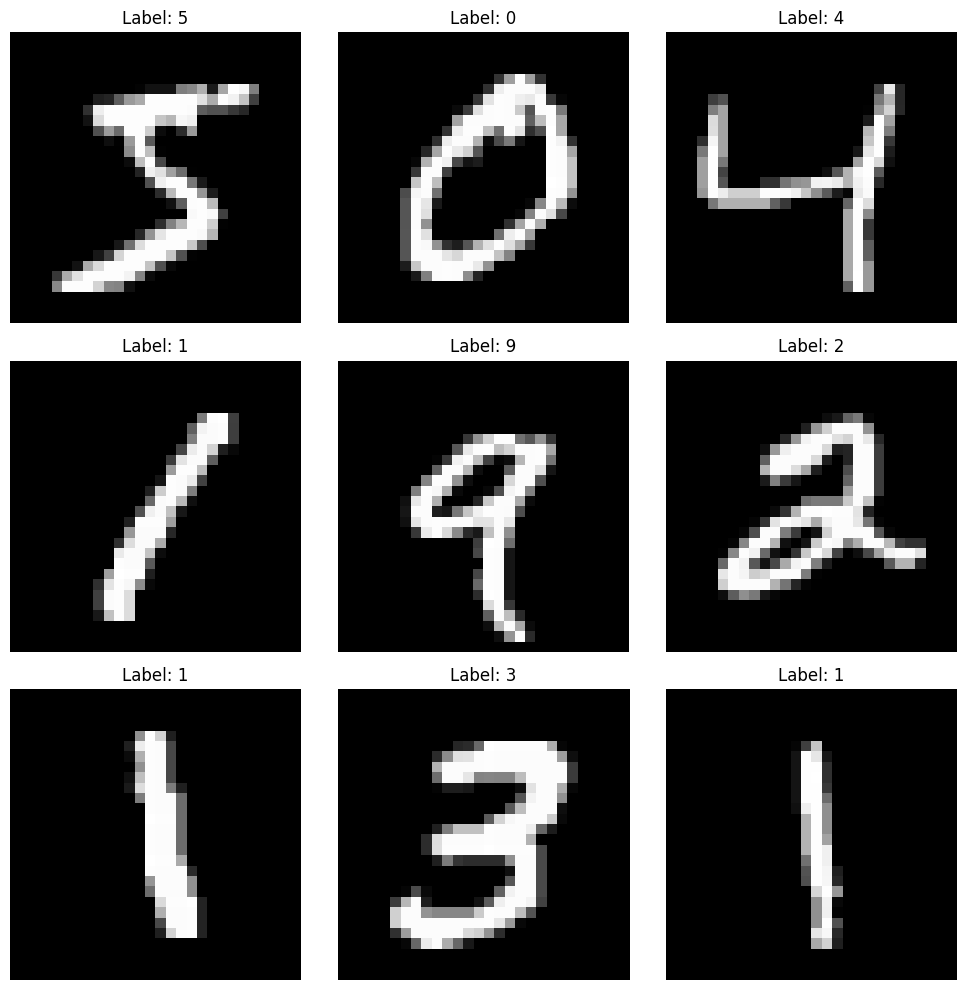

In [3]:
import matplotlib.pyplot as plt

num_images_to_display = 9
plt.figure(figsize=(10, 10))
for i in range(num_images_to_display):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_X[i], cmap='gray')  # Show images in grayscale
    plt.title(f"Label: {train_Y[i]}")
    plt.axis('off')  # Hide axis
plt.tight_layout()
plt.show()

**1 B)**

Train dataset - Input data shape after reshaping: (60000, 28, 28, 1)
Test dataset - Input data shape after reshaping: (10000, 28, 28, 1)
Train dataset - Output data shape after one-hot encoding: (60000, 10)
Test dataset - Output data shape after one-hot encoding: (10000, 10)


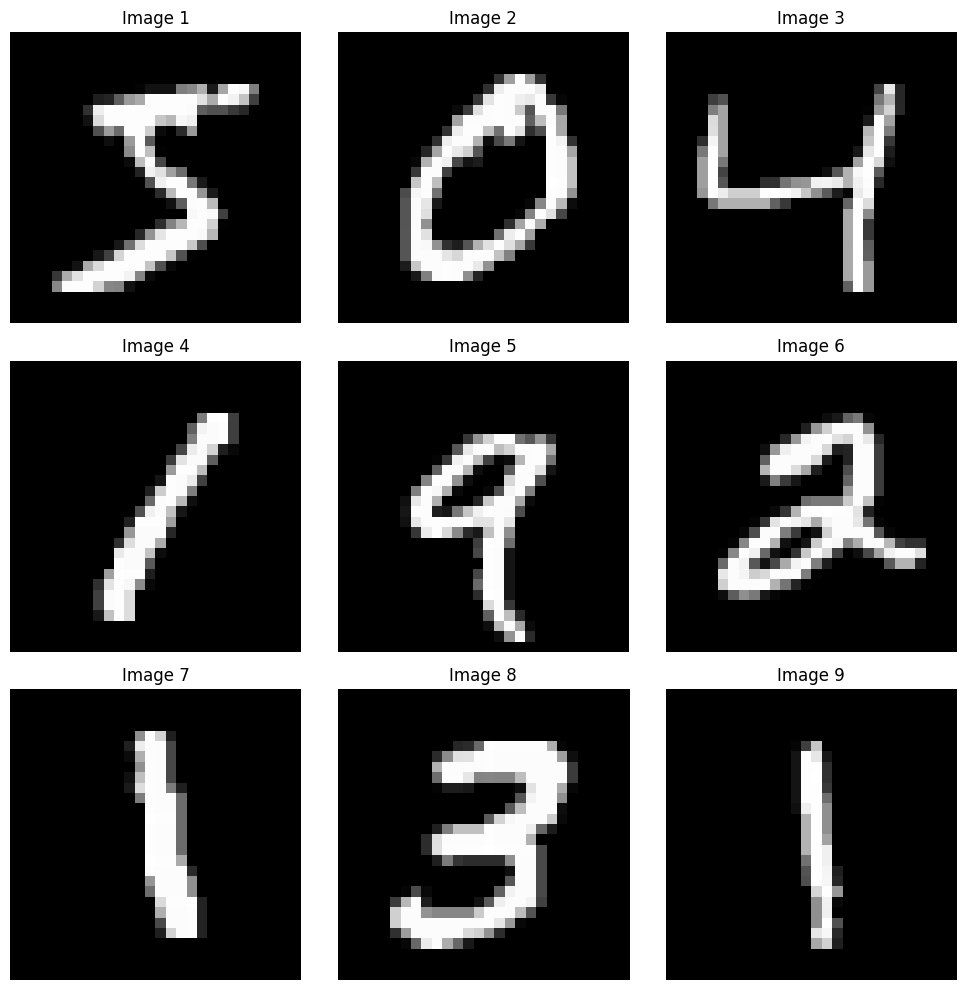

In [13]:
import numpy as np
from keras.utils import to_categorical

def data_preprocess(train_X, test_X, train_Y, test_Y):
  train_X = np.reshape(train_X, (train_X.shape[0], 28, 28, 1))
  test_X = np.reshape(test_X, (test_X.shape[0], 28, 28, 1))

  # Display the new shapes
  print("Train dataset - Input data shape after reshaping:", train_X.shape)
  print("Test dataset - Input data shape after reshaping:", test_X.shape)

  train_Y_one_hot = to_categorical(train_Y, num_classes=10)
  test_Y_one_hot = to_categorical(test_Y, num_classes=10)

  # Display the shapes of the one-hot encoded outputs
  print("Train dataset - Output data shape after one-hot encoding:", train_Y_one_hot.shape)
  print("Test dataset - Output data shape after one-hot encoding:", test_Y_one_hot.shape)

  # Scaling the data

  train_X_scaled = train_X.astype('float32') / 255.0
  test_X_scaled = test_X.astype('float32') / 255.0

  num_images_to_display = 9
  plt.figure(figsize=(10, 10))
  for i in range(num_images_to_display):
      plt.subplot(3, 3, i + 1)
      plt.imshow(train_X_scaled[i], cmap='gray')
      plt.title(f"Image {i + 1}")
      plt.axis('off')
  plt.tight_layout()
  plt.show()
  return train_X_scaled, test_X_scaled, train_Y_one_hot, test_Y_one_hot

train_X_scaled, test_X_scaled, train_Y_one_hot, test_Y_one_hot = data_preprocess(train_X, test_X, train_Y, test_Y)

**1 c)**

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

def create_cnn ( ) :
  # define using Sequential
  model = Sequential ()
  # Convolution layer
  model . add (
  Conv2D(32, (3, 3),
  activation= 'relu' , kernel_initializer='he_uniform' , input_shape=(28, 28, 1))
  )
  # Maxpooling layer
  model.add(MaxPooling2D((2, 2)))
  # Flatten output
  model.add( Flatten () )
  # Dense layer of 100 neurons
  model . add (
  Dense (100 ,
  activation= 'relu' , kernel_initializer='he_uniform') )
  model.add(Dense(10, activation='softmax')) # initialize optimizer
  opt = SGD(lr=0.01, momentum=0.9)
  # compile model
  model . compile ( optimizer=opt ,
  loss= 'categorical_crossentropy' , metrics =[ 'accuracy' ]
  )
  return model

In [15]:
model = create_cnn()

print(model.layers)

[<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7d81d54fa2f0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7d81e29790c0>, <keras.src.layers.reshaping.flatten.Flatten object at 0x7d81e2978550>, <keras.src.layers.core.dense.Dense object at 0x7d81d5542350>, <keras.src.layers.core.dense.Dense object at 0x7d81d5541a80>]


**1 d)**

In [16]:
model.fit(train_X_scaled, train_Y_one_hot, batch_size=32, epochs=10, validation_split =0.1)

Epoch 1/10
1688/1688 [==============================] - 37s 21ms/step - loss: 0.1688 - accuracy: 0.9477 - val_loss: 0.0710 - val_accuracy: 0.9795
Epoch 2/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0598 - accuracy: 0.9818 - val_loss: 0.0516 - val_accuracy: 0.9852
Epoch 3/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0383 - accuracy: 0.9881 - val_loss: 0.0465 - val_accuracy: 0.9875
Epoch 4/10
1688/1688 [==============================] - 35s 21ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0460 - val_accuracy: 0.9877
Epoch 5/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0184 - accuracy: 0.9944 - val_loss: 0.0504 - val_accuracy: 0.9880
Epoch 6/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0125 - accuracy: 0.9964 - val_loss: 0.0649 - val_accuracy: 0.9863
Epoch 7/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0095 - accuracy: 0.9976 - val_loss: 0.0508 -

In [17]:
model.save('deep_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/deep_cnn.h5')

score = loaded_model.evaluate(test_X_scaled, test_Y_one_hot, verbose=0)
print("Test Accuracy:", score[1])

Test Accuracy: 0.9894000291824341


313/313 [==============================] - 5s 14ms/step


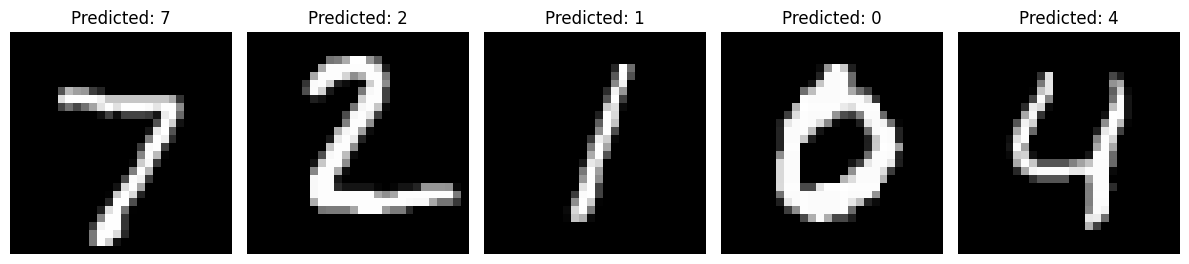

In [20]:
predictions = loaded_model.predict(test_X)

predicted_labels = np.argmax(predictions, axis=1)

num_images_to_show = 5

plt.figure(figsize=(12, 6))
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(test_X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()

** 1 E) Experimentation **

In [22]:
# Training for 50 epochs
model_50 = create_cnn()

print(model_50.layers)

epoch_history = model_50.fit(train_X_scaled, train_Y_one_hot, batch_size=32, epochs=50, validation_split =0.1)

[<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7d81cddebc10>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7d81d4116380>, <keras.src.layers.reshaping.flatten.Flatten object at 0x7d81d4114040>, <keras.src.layers.core.dense.Dense object at 0x7d81d4115240>, <keras.src.layers.core.dense.Dense object at 0x7d81d41155a0>]
Epoch 1/50
1688/1688 [==============================] - 33s 20ms/step - loss: 0.1669 - accuracy: 0.9485 - val_loss: 0.0663 - val_accuracy: 0.9842
Epoch 2/50
1688/1688 [==============================] - 36s 21ms/step - loss: 0.0604 - accuracy: 0.9817 - val_loss: 0.0526 - val_accuracy: 0.9863
Epoch 3/50
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0388 - accuracy: 0.9883 - val_loss: 0.0427 - val_accuracy: 0.9897
Epoch 4/50
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0430 - val_accuracy: 0.9897
Epoch 5/50
1688/1688 [==============================] - 33s 19ms/st

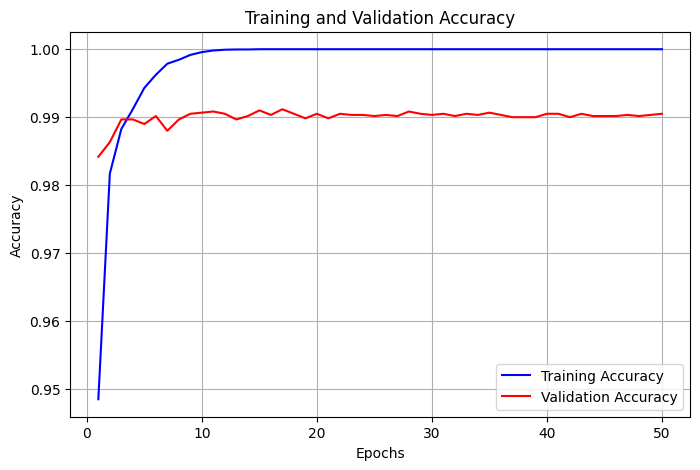

In [25]:
train_accuracy = epoch_history.history['accuracy']
val_accuracy = epoch_history.history['val_accuracy']

epochs = range(1, 51)
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 51, step=10))
plt.legend()
plt.grid()
plt.show()

In [27]:
from keras . layers import Dropout

def create_cnn_with_dropout ( ) :
  # define using Sequential
  model = Sequential ( )
  # Convolution layer
  model . add (
  Conv2D(32 , ( 3 , 3) ,
  activation = 'relu' ,
  kernel_initializer = 'he_uniform' ,
  input_shape =(28 , 28 , 1) )
  )
  # Maxpooling layer
  model . add ( MaxPooling2D ( ( 2 , 2) ) )
  # Flatten output
  model . add ( Flatten ( ) )
  #Dropout to reduce overfitting
  model . add ( Dropout (0.5) )
  # Dense layer of 100 neurons
  model . add (Dense (100 ,activation = 'relu' ,kernel_initializer = 'he_uniform' ))
  model . add ( Dense(10 , activation = 'softmax' ) )
  # i n i t i a l i z e optimizer
  opt = SGD( lr =0.01 , momentum=0.9)
  # compile model
  model . compile (
  optimizer=opt ,
  loss = 'categorical_crossentropy' ,
  metrics =[ 'accuracy' ]
  )
  return model

model_dropout = create_cnn_with_dropout ( )

epoch_history = model_dropout.fit(train_X_scaled, train_Y_one_hot, batch_size=32, epochs=50, validation_split =0.1)

Epoch 1/50
1688/1688 [==============================] - 41s 24ms/step - loss: 0.2201 - accuracy: 0.9314 - val_loss: 0.0675 - val_accuracy: 0.9805
Epoch 2/50
1688/1688 [==============================] - 36s 21ms/step - loss: 0.0900 - accuracy: 0.9720 - val_loss: 0.0506 - val_accuracy: 0.9860
Epoch 3/50
1688/1688 [==============================] - 38s 23ms/step - loss: 0.0661 - accuracy: 0.9795 - val_loss: 0.0534 - val_accuracy: 0.9858
Epoch 4/50
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0558 - accuracy: 0.9819 - val_loss: 0.0434 - val_accuracy: 0.9883
Epoch 5/50
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.0397 - val_accuracy: 0.9880
Epoch 6/50
1688/1688 [==============================] - 38s 22ms/step - loss: 0.0386 - accuracy: 0.9871 - val_loss: 0.0434 - val_accuracy: 0.9893
Epoch 7/50
1688/1688 [==============================] - 38s 23ms/step - loss: 0.0319 - accuracy: 0.9894 - val_loss: 0.0384 -

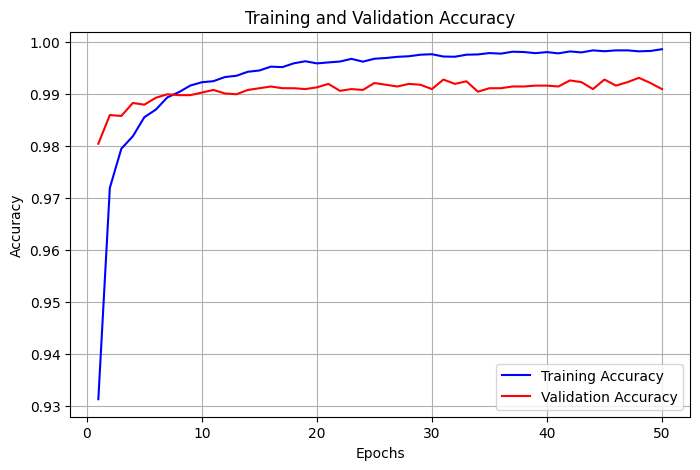

In [28]:
train_accuracy = epoch_history.history['accuracy']
val_accuracy = epoch_history.history['val_accuracy']

epochs = range(1, 51)
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 51, step=10))  # X-axis ticks at every 10 epochs
plt.legend()
plt.grid()
plt.show()

In [29]:
def create_cnn_2 ( ) :
  # define using Sequential
  model = Sequential ( )
  # Convolution layer
  model . add (
  Conv2D(32 , ( 3 , 3) ,
  activation = 'relu' ,
  kernel_initializer = 'he_uniform' ,
  input_shape =(28 , 28 , 1) )
  )
  # Maxpooling layer
  model . add ( MaxPooling2D ( ( 2 , 2) ) )

  model . add (
  Conv2D(64 , ( 3 , 3) ,
  activation = 'relu' ,
  kernel_initializer = 'he_uniform' ,
  input_shape =(28 , 28 , 1) )
  )
  model . add ( MaxPooling2D ( ( 2 , 2) ) )

  # Flatten output
  model . add ( Flatten ( ) )
  #Dropout to reduce overfitting
  model . add ( Dropout (0.5) )
  # Dense layer of 100 neurons
  model . add (Dense (100 ,activation = 'relu' ,kernel_initializer = 'he_uniform' ))
  model . add ( Dense(10 , activation = 'softmax' ) )
  # i n i t i a l i z e optimizer
  opt = SGD( lr =0.01 , momentum=0.9)
  # compile model
  model . compile (
  optimizer=opt ,
  loss = 'categorical_crossentropy' ,
  metrics =[ 'accuracy' ]
  )
  return model

model = create_cnn_2 ( )

model.fit(train_X_scaled, train_Y_one_hot, batch_size=32, epochs=10, validation_split =0.1)

score = model.evaluate(test_X_scaled, test_Y_one_hot, verbose=0)
print("Test Accuracy:", score[1])

Epoch 1/10
1688/1688 [==============================] - 55s 32ms/step - loss: 0.1987 - accuracy: 0.9374 - val_loss: 0.0592 - val_accuracy: 0.9823
Epoch 2/10
1688/1688 [==============================] - 52s 31ms/step - loss: 0.0822 - accuracy: 0.9743 - val_loss: 0.0406 - val_accuracy: 0.9888
Epoch 3/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.0612 - accuracy: 0.9808 - val_loss: 0.0347 - val_accuracy: 0.9893
Epoch 4/10
1688/1688 [==============================] - 52s 31ms/step - loss: 0.0518 - accuracy: 0.9835 - val_loss: 0.0376 - val_accuracy: 0.9882
Epoch 5/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.0463 - accuracy: 0.9855 - val_loss: 0.0306 - val_accuracy: 0.9917
Epoch 6/10
1688/1688 [==============================] - 53s 31ms/step - loss: 0.0394 - accuracy: 0.9876 - val_loss: 0.0308 - val_accuracy: 0.9915
Epoch 7/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0305 -

In [30]:
def create_cnn_lr (lr) :
  # define using Sequential
  model = Sequential ( )
  # Convolution layer
  model . add (
  Conv2D(32 , ( 3 , 3) ,
  activation = 'relu' ,
  kernel_initializer = 'he_uniform' ,
  input_shape =(28 , 28 , 1) )
  )
  # Maxpooling layer
  model . add ( MaxPooling2D ( ( 2 , 2) ) )

  model . add (
  Conv2D(64 , ( 3 , 3) ,
  activation = 'relu' ,
  kernel_initializer = 'he_uniform' ,
  input_shape =(28 , 28 , 1) )
  )
  model . add ( MaxPooling2D ( ( 2 , 2) ) )

  # Flatten output
  model . add ( Flatten ( ) )
  #Dropout to reduce overfitting
  model . add ( Dropout (0.5) )
  # Dense layer of 100 neurons
  model . add (Dense (100 ,activation = 'relu' ,kernel_initializer = 'he_uniform' ))
  model . add ( Dense(10 , activation = 'softmax' ) )
  # i n i t i a l i z e optimizer
  opt = SGD( lr = lr , momentum=0.9)
  # compile model
  model . compile (
  optimizer=opt ,
  loss = 'categorical_crossentropy' ,
  metrics =[ 'accuracy' ]
  )
  return model

model1 = create_cnn_lr(0.1)
model2 = create_cnn_lr(0.001)

model1.fit(train_X_scaled, train_Y_one_hot, batch_size=32, epochs=10, validation_split =0.1)
model2.fit(train_X_scaled, train_Y_one_hot, batch_size=32, epochs=10, validation_split =0.1)

score1 = model1 . evaluate (test_X_scaled, test_Y_one_hot, verbose=0)
print('Score with lr=0.1', score1)

score2 = model2 . evaluate (test_X_scaled, test_Y_one_hot, verbose=0)
print('Score with lr=0.001', score2)

Epoch 1/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.2006 - accuracy: 0.9377 - val_loss: 0.0515 - val_accuracy: 0.9848
Epoch 2/10
1688/1688 [==============================] - 56s 33ms/step - loss: 0.0814 - accuracy: 0.9742 - val_loss: 0.0372 - val_accuracy: 0.9895
Epoch 3/10
1688/1688 [==============================] - 55s 33ms/step - loss: 0.0656 - accuracy: 0.9794 - val_loss: 0.0380 - val_accuracy: 0.9890
Epoch 4/10
1688/1688 [==============================] - 53s 31ms/step - loss: 0.0510 - accuracy: 0.9836 - val_loss: 0.0347 - val_accuracy: 0.9907
Epoch 5/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.0459 - accuracy: 0.9851 - val_loss: 0.0329 - val_accuracy: 0.9890
Epoch 6/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.0392 - accuracy: 0.9869 - val_loss: 0.0304 - val_accuracy: 0.9903
Epoch 7/10
1688/1688 [==============================] - 52s 31ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0329 -

**F) Analysis**

i. Dropout Layer Trends: Dropout initially lowers training accuracy, reducing overfitting. Validation accuracy might lag initially but catch up later as the model generalizes better.

ii. CNN Layer Comparisons: A CNN with two convolution layers learns complex, hierarchical features better than a single-layer CNN, potentially improving accuracy with richer representations.

iii. Learning Rate Impact: Higher learning rates aid faster convergence but risk overshooting. Lower rates yield precision but might prolong training; finding a balance optimizes convergence without instability.